In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import learning_curve, validation_curve

In [2]:
def load_tic_toe_data(data_path='./data/tic-tac-toe/tic-tac-toe.data'):
    return pd.read_csv(data_path)

Experiment with decsion trees

In [3]:
tic_tac_toe_data = load_tic_toe_data()

In [4]:
for col_name in tic_tac_toe_data.columns:
#     print(tic_tac_toe_data[col_name].dtype)
    if(tic_tac_toe_data[col_name].dtype == 'object'):
        tic_tac_toe_data[col_name]= tic_tac_toe_data[col_name].astype('category')
        tic_tac_toe_data[col_name] = tic_tac_toe_data[col_name].cat.codes
tic_tac_toe_data.describe()
# tic_tac_toe_data.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.221526,1.132706,1.221526,1.132706,1.311390,1.133751,1.221526,1.133751,1.222571,0.653083
std,0.775566,0.798892,0.775566,0.798892,0.741201,0.799372,0.775566,0.799372,0.775941,0.476238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [5]:
# print(tic_tac_toe_data.iloc[:, np.r_[0:9]].head())
# print(tic_tac_toe_data.iloc[:, np.r_[9:10]].tail())
X = tic_tac_toe_data.iloc[:, np.r_[0:9]]
y = tic_tac_toe_data.iloc[:, np.r_[9:10]]

In [6]:
# tic_train_set, tic_test_set = train_test_split(tic_tac_toe_data, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [8]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

<ipython-input-8-fcf8b83a6753>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)


KNeighborsClassifier()

In [9]:
cross_val_score(clf, X_train, y_train, cv=5)

C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\model_selection\_validat

array([0.7751938, 0.859375 , 0.8046875, 0.8359375, 0.8046875])

In [10]:
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
# train_precision = precision_score(y_train, tree_clf.predict(X_train))
# test_precision = precision_score(y_test, tree_clf.predict(X_test))
print(train_accuracy)
print(test_accuracy)
# tree_clf.get_depth()
# print(train_precision, test_precision)

0.8673946957878315
0.8354430379746836


In [11]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, random_state=42)


C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\model_selection\_validat

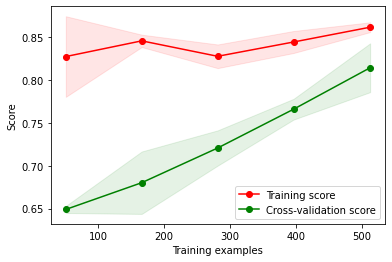

In [12]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
# C_range = 10. ** np.arange(-3, 8)
# gamma_range = 10. ** np.arange(-5, 4)
n_range = range(1, 50, 5)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
param_grid = dict(n_neighbors=n_range)
grid = GridSearchCV(KNeighborsClassifier(weights='uniform'), param_grid=param_grid, cv=cv, n_jobs=6)

grid.fit(X_train, y_train)

print("The best classifier is: ", grid.best_estimator_)

The best classifier is:  KNeighborsClassifier(n_neighbors=26)


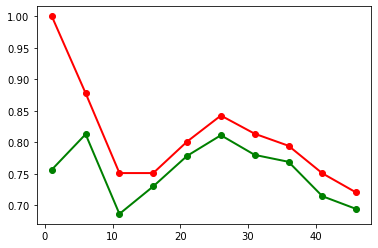

In [18]:
lw = 2
param_range = range(1, 50, 5)
train_scores, test_scores = validation_curve(KNeighborsClassifier(weights='uniform'), X_train, y_train, param_name="n_neighbors", param_range=param_range, scoring="accuracy", cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(param_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(param_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

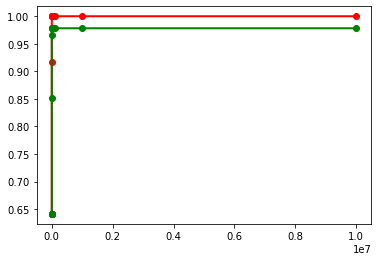

In [26]:
lw = 2
C_range = 10. ** np.arange(-3, 8)
train_scores, test_scores = validation_curve(SVC(kernel='rbf'), X_train, y_train, param_name="C", param_range=C_range, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(C_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(C_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

In [22]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [23]:
mnist_X, mnist_y = mnist["data"], mnist["target"].astype(np.uint8)
print(mnist_X.shape, mnist_y.shape)

(70000, 784) (70000,)


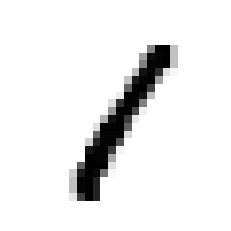

1


In [234]:
mnist_i = 3
some_digit = mnist_X[mnist_i]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
print (mnist_y[mnist_i])

In [28]:
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, test_size=.33, random_state=42)

In [29]:
mnist_tree_clf = SVC(kernel='rbf', random_state=42)
mnist_tree_clf.fit(mnist_X_train, mnist_y_train)

SVC(random_state=42)

In [30]:
cross_val_score(mnist_tree_clf, mnist_X_train, mnist_y_train, cv=3)

array([0.97460663, 0.97370946, 0.97351756])

In [247]:
mnist_tree_clf.get_depth()

14

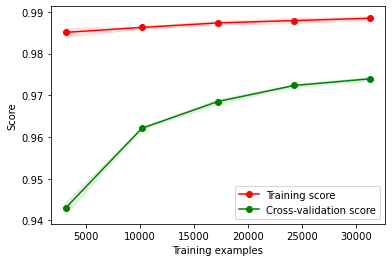

In [31]:
train_sizes, train_scores, test_scores = learning_curve(mnist_tree_clf, mnist_X_train, mnist_y_train, cv=3, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

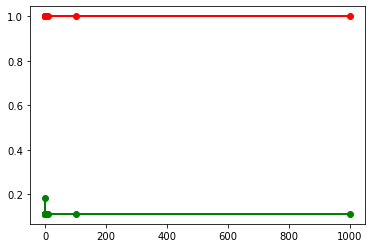

In [32]:
lw = 2
param_range = 10. ** np.arange(-5, 4)
train_scores, test_scores = validation_curve(SVC(kernel='rbf'), mnist_X_train, mnist_y_train, param_name="gamma", param_range=param_range, scoring="accuracy", cv=3, n_jobs=6)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(param_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(param_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)